In [1]:
from keras.layers import Conv2D,Dense,Flatten,AveragePooling2D,Dropout
from keras.models import Sequential
import numpy as np 
from keras.utils import to_categorical
import matplotlib.pyplot as plt
from keras.losses import categorical_crossentropy
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
imgrow=28
imgcols=28
imgclass=10

Using TensorFlow backend.


In [2]:
def read_data(data):
    y=data[:,0]
    yout=to_categorical(y,imgclass)
    num_iamges=data.shape[0]
    x=data[:,1:]
    xout=x.reshape(num_iamges,imgrow,imgcols,1)
    xout=xout/255
    return xout,yout    

In [3]:
traindata=np.loadtxt('train.csv',skiprows=1,delimiter=',')
x,y=read_data(traindata)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.1)
print(X_train.shape)
print(X_test.shape)

(37800, 28, 28, 1)
(4200, 28, 28, 1)


(42000, 28, 28, 1)
1


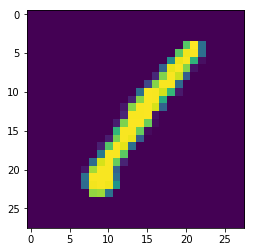

In [18]:
print(x.shape)
plt.imshow(x[0,:,:].reshape(28,28))
print(np.argmax(y[0]))

In [19]:
mymodel=Sequential()
mymodel.add(Dropout(0.3))
mymodel.add(Conv2D(30,kernel_size=(3,3),activation='relu',input_shape=(imgrow,imgcols,1),strides=2))
mymodel.add(Conv2D(30,kernel_size=(3,3),activation='relu',strides=2)) 
mymodel.add(Conv2D(30,kernel_size=(2,2),activation='relu',strides=1))
mymodel.add(Flatten())
mymodel.add(Dense(128,activation='relu'))
mymodel.add(Dense(imgclass,activation='softmax'))

mymodel.compile(loss = categorical_crossentropy,optimizer='adam',metrics=['accuracy'])
mymodel.fit(X_train,y_train,batch_size=128,epochs=10,validation_split=0.2)

Train on 30240 samples, validate on 7560 samples
Epoch 1/10
30240/30240 [==============================] - 8s 264us/step - loss: 0.4825 - acc: 0.8531 - val_loss: 0.1616 - val_acc: 0.9563
Epoch 2/10
30240/30240 [==============================] - 6s 201us/step - loss: 0.1535 - acc: 0.9537 - val_loss: 0.1114 - val_acc: 0.9680
Epoch 3/10
30240/30240 [==============================] - 7s 231us/step - loss: 0.1024 - acc: 0.9681 - val_loss: 0.0789 - val_acc: 0.9765
Epoch 4/10
30240/30240 [==============================] - 7s 231us/step - loss: 0.0816 - acc: 0.9727 - val_loss: 0.0736 - val_acc: 0.9791
Epoch 5/10
30240/30240 [==============================] - 6s 210us/step - loss: 0.0685 - acc: 0.9774 - val_loss: 0.0689 - val_acc: 0.9819
Epoch 6/10
30240/30240 [==============================] - 6s 211us/step - loss: 0.0569 - acc: 0.9807 - val_loss: 0.0605 - val_acc: 0.9831
Epoch 7/10
30240/30240 [==============================] - 7s 221us/step - loss: 0.0504 - acc: 0.9833 - val_loss: 0.0633 - v

0
0


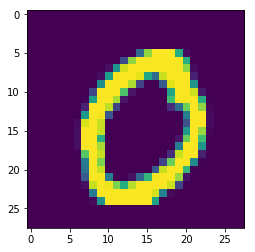

In [36]:
i=300
preds=mymodel.predict(X_test)[i]
print(np.argmax(preds))
plt.imshow(X_test[i,:,:].reshape(28,28))
print(np.argmax(y_test[i]))

In [20]:
testimgs=['9','2','5','7'] ## Manual input 
for i in testimgs:
    xtest=mpimg.imread('testimgs/'+i+'.jpg')
    #plt.imshow(xtest/255)
    print('Actuall: '+i,end='')
    xtest=xtest[:,:,2]
    xtest=xtest.reshape(1,28,28,1)
    preds=mymodel.predict(xtest/255)
    print(' Predicted: ',end='')
    print(np.argmax(preds))
    #|print(preds)



Actuall: 9 Predicted: 6
Actuall: 2 Predicted: 2
Actuall: 5 Predicted: 5
Actuall: 7 Predicted: 2
